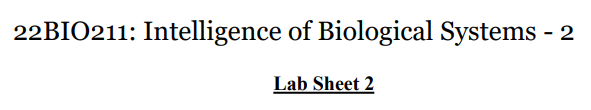

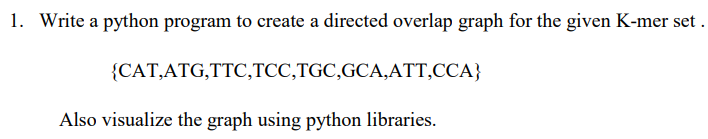

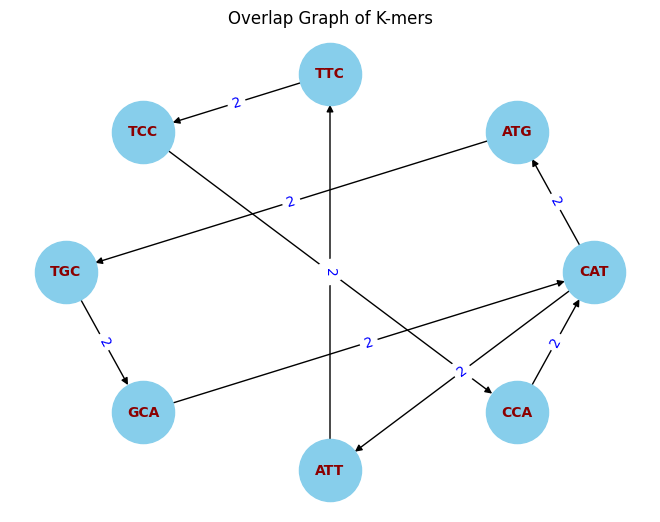

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def create_overlap_graph(kmers):
    G = nx.DiGraph()

    for kmer in kmers:
        G.add_node(kmer)

    # Add directed edges if the suffix of one k-mer matches the prefix of another
    for i in range(len(kmers)):
        for j in range(len(kmers)):
            if i != j and kmers[i][1:] == kmers[j][:-1]:
                G.add_edge(kmers[i], kmers[j], overlap_length=len(kmers[i])-1)

    return G

def draw_graph(G):
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='k', node_size=2000, font_size=10, font_color='darkred', font_weight='bold', arrowstyle='-|>', arrowsize=10)

    edge_labels = nx.get_edge_attributes(G, 'overlap_length')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='blue')

    plt.title("Overlap Graph of K-mers")
    plt.show()

kmers = ['CAT', 'ATG', 'TTC', 'TCC', 'TGC', 'GCA', 'ATT', 'CCA']
overlap_graph = create_overlap_graph(kmers)
draw_graph(overlap_graph)


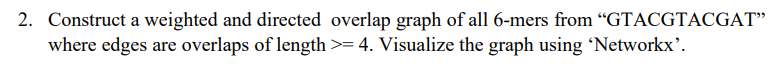

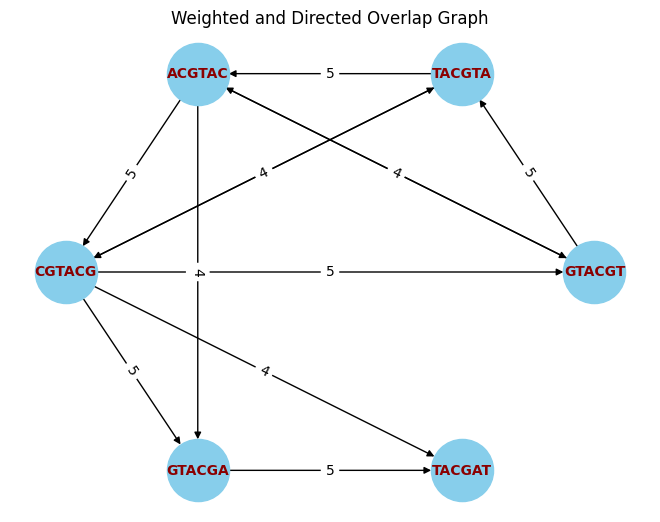

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def generate_kmers(sequence, k):
    return [sequence[i:i+k] for i in range(len(sequence) - k + 1)]

def create_overlap_graph(kmers, min_overlap):
    G = nx.DiGraph()

    for kmer in kmers:
        G.add_node(kmer)

    # Add directed edges with weights representing overlap length
    for i in range(len(kmers)):
        for j in range(len(kmers)):
            if i != j:
                overlap = get_overlap_length(kmers[i], kmers[j])
                if overlap >= min_overlap:
                    G.add_edge(kmers[i], kmers[j], weight=overlap)

    return G

def get_overlap_length(s1, s2):
    max_overlap = min(len(s1), len(s2))
    for i in range(max_overlap, 0, -1):
        if s1.endswith(s2[:i]):
            return i
    return 0

def draw_graph(G):
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='k', node_size=2000, font_size=10, font_color='darkred', font_weight='bold', arrowstyle='-|>', arrowsize=10)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Weighted and Directed Overlap Graph")
    plt.show()

sequence = "GTACGTACGAT"
k = 6
min_overlap = 4

kmers = generate_kmers(sequence, k)

overlap_graph = create_overlap_graph(kmers, min_overlap)
draw_graph(overlap_graph)


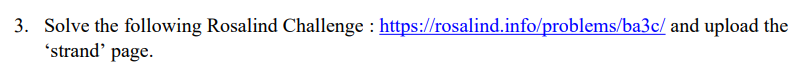

In [ ]:
def construct_overlap_graph(kmers):
    overlap_graph = {}

    for kmer in kmers:
        prefix = kmer[:-1]
        suffix = kmer[1:]

        for other_kmer in kmers:
            if kmer == other_kmer:
                continue

            if suffix == other_kmer[:-1]:
                # Add directed edge from the current k-mer to the other k-mer
                if kmer not in overlap_graph:
                    overlap_graph[kmer] = [other_kmer]
                else:
                    overlap_graph[kmer].append(other_kmer)

    return overlap_graph

patterns = ["ATGCG", "GCATG", "CATGC", "AGGCA", "GGCAT"]

overlap_graph = construct_overlap_graph(patterns)

for kmer, neighbors in overlap_graph.items():
    print(f"{kmer} -> {' '.join(neighbors)}")


GCATG -> CATGC
CATGC -> ATGCG
AGGCA -> GGCAT
GGCAT -> GCATG


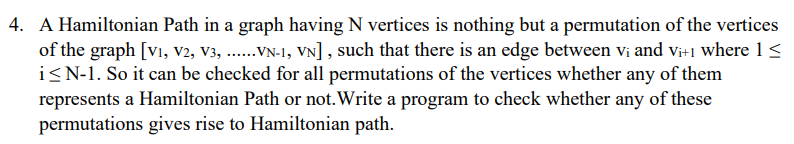

In [ ]:
from itertools import permutations

def get_all_permutations(keys):
    return permutations(keys)

def isHamiltonian(graph, path):
    for i in range(len(path) - 1):
        # Check if there's a direct edge between each consecutive pair in the path
        if path[i+1] not in graph[path[i]]:
            return False
    return True

def HamiltonianPath(graph):
    #Determine if there exists any Hamiltonian path in the given graph
    Allp = get_all_permutations(graph.keys())
    for p in Allp:
        if isHamiltonian(graph, p):
            print("Hamiltonian path found and the path is:", p)
            return True
    print("No Hamiltonian path found")
    return False

graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A', 'D'],
    'D': ['B', 'C']
}

result = HamiltonianPath(graph)

Hamiltonian path found and the path is: ('A', 'B', 'D', 'C')


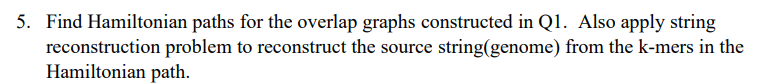

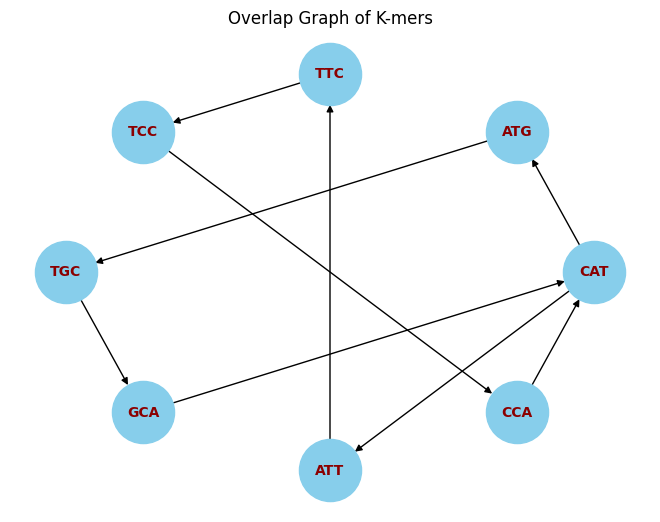

Hamiltonian paths found:
('ATG', 'TGC', 'GCA', 'CAT', 'ATT', 'TTC', 'TCC', 'CCA')

Reconstructed String: ATGCATTCCA
('ATT', 'TTC', 'TCC', 'CCA', 'CAT', 'ATG', 'TGC', 'GCA')

Reconstructed String: ATTCCATGCA


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import permutations

def create_overlap_graph(kmers):
    G = nx.DiGraph()
    for kmer in kmers:
        G.add_node(kmer)
    for i in range(len(kmers)):
        for j in range(len(kmers)):
            if i != j and kmers[i][1:] == kmers[j][:-1]:
                G.add_edge(kmers[i], kmers[j])
    return G

def draw_graph(G):
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='k', node_size=2000, font_size=10, font_color='darkred', font_weight='bold', arrowstyle='-|>', arrowsize=10)
    plt.title("Overlap Graph of K-mers")
    plt.show()

def find_hamiltonian_paths(G):
    paths = []
    for perm in permutations(G.nodes()):
        if all(perm[i] in G[perm[i-1]] for i in range(1, len(perm))):
            paths.append(perm)
    return paths

def reconstruct_string_from_path(path):
    if not path:
        return ""
    # Starting with the first k-mer entirely
    reconstructed_string = path[0]
    # Then appending only the last character of each subsequent k-mer
    for kmer in path[1:]:
        reconstructed_string += kmer[-1]
    return reconstructed_string

kmers = ['CAT', 'ATG', 'TTC', 'TCC', 'TGC', 'GCA', 'ATT', 'CCA']
overlap_graph = create_overlap_graph(kmers)
draw_graph(overlap_graph)

hamiltonian_paths = find_hamiltonian_paths(overlap_graph)
if hamiltonian_paths:
    print("Hamiltonian paths found:")
    for path in hamiltonian_paths:
        print(path)
        # Reconstruct string from the path
        reconstructed_string = reconstruct_string_from_path(path)
        print("\nReconstructed String:", reconstructed_string)
else:
    print("\nNo Hamiltonian path found")


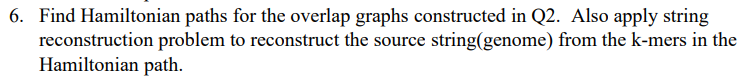

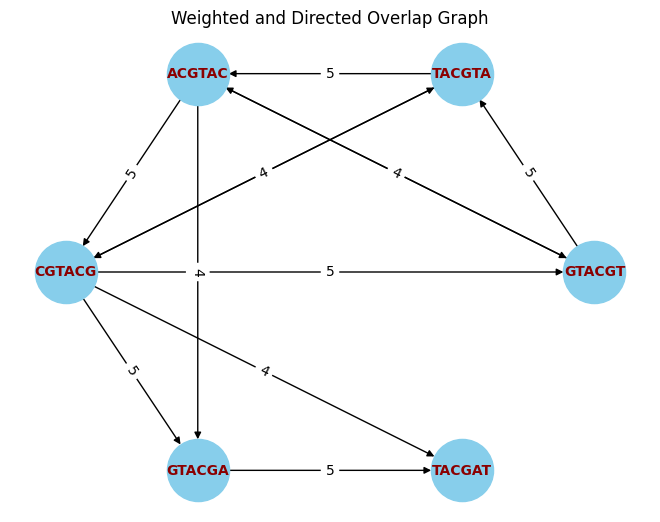

Hamiltonian paths found:
('GTACGT', 'TACGTA', 'ACGTAC', 'CGTACG', 'GTACGA', 'TACGAT')

Reconstructed String: GTACGTACGAT
('TACGTA', 'CGTACG', 'GTACGT', 'ACGTAC', 'GTACGA', 'TACGAT')

Reconstructed String: TACGTACGTACGAT
('ACGTAC', 'GTACGT', 'TACGTA', 'CGTACG', 'GTACGA', 'TACGAT')

Reconstructed String: ACGTACGTACGAT
('CGTACG', 'GTACGT', 'TACGTA', 'ACGTAC', 'GTACGA', 'TACGAT')

Reconstructed String: CGTACGTACGAT


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import permutations

def generate_kmers(sequence, k):
    #Generate all k-mers of the given length k from sequence.
    return [sequence[i:i+k] for i in range(len(sequence) - k + 1)]

def create_overlap_graph(kmers, min_overlap):
    #Create a directed graph from k-mers with edges set by minimum overlap.
    G = nx.DiGraph()
    for kmer in kmers:
        G.add_node(kmer)
    for i in range(len(kmers)):
        for j in range(len(kmers)):
            if i != j:
                overlap = get_overlap_length(kmers[i], kmers[j])
                if overlap >= min_overlap:
                    G.add_edge(kmers[i], kmers[j], weight=overlap)
    return G

def get_overlap_length(s1, s2):
    #Return maximum overlap length between s1 and s2.
    max_overlap = min(len(s1), len(s2))
    for i in range(max_overlap, 0, -1):
        if s1.endswith(s2[:i]):
            return i
    return 0

def draw_graph(G):
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='k', node_size=2000, font_size=10, font_color='darkred', font_weight='bold', arrowstyle='-|>', arrowsize=10)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Weighted and Directed Overlap Graph")
    plt.show()

def find_hamiltonian_paths(G):
    paths = []
    for perm in permutations(G.nodes()):
        valid_path = True
        for i in range(len(perm) - 1):
            if not G.has_edge(perm[i], perm[i+1]):
                valid_path = False
                break
        if valid_path:
            paths.append(perm)
    return paths

def reconstruct_string_from_path(path):
    if not path:
        return ""
    reconstructed_string = path[0]  # Starting with the first k-mer
    for i in range(1, len(path)):
        overlap = get_overlap_length(path[i-1], path[i])
        reconstructed_string += path[i][overlap:]
    return reconstructed_string

sequence = "GTACGTACGAT"
k = 6
min_overlap = 4

kmers = generate_kmers(sequence, k)
overlap_graph = create_overlap_graph(kmers, min_overlap)
draw_graph(overlap_graph)

hamiltonian_paths = find_hamiltonian_paths(overlap_graph)
if hamiltonian_paths:
    print("Hamiltonian paths found:")
    for path in hamiltonian_paths:
        print(path)
        reconstructed_string = reconstruct_string_from_path(path)
        print("\nReconstructed String:", reconstructed_string)
else:
    print("No Hamiltonian path found")
